## MACHINE LEARNING REGRESSION

### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING THE DATASET

In [3]:
df = pd.read_csv("USA_Housing - USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


### Dropping the Address Column from the dataset

In [14]:
df.drop(columns = 'Address')
df.head()

KeyError: "['Address'] not found in axis"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.4 KB


In [16]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [18]:
df.shape

(5000, 6)

### Comparing "Avg. Area House Age" and "Area Population" using Jointplot

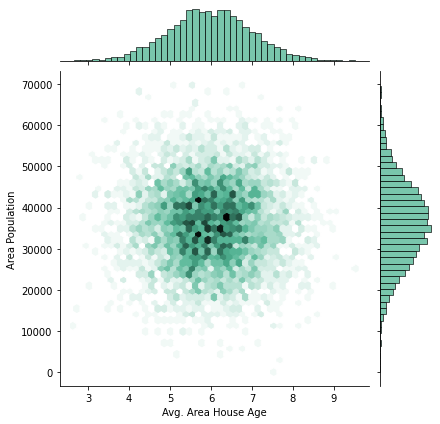

In [19]:
import seaborn as sns
sns.jointplot(x="Avg. Area House Age", y="Area Population", data=df, kind="hex", color="#4CB391")

### Linear Model plot of "Avg. Area Income" and "Price" Using Seaborn’s Lmplot)

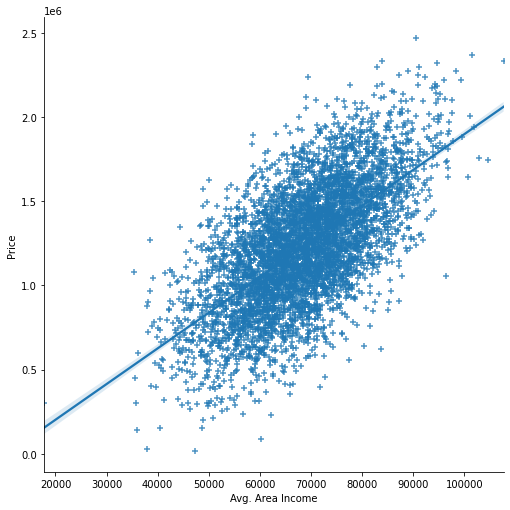

In [21]:
sns.lmplot(x='Avg. Area Income', y='Price', data=df, markers="+",  palette="bright", height = 7)

### Visualizing with "Pairplot" and "Heatmap" to show the most correlated features with "Price" Feature

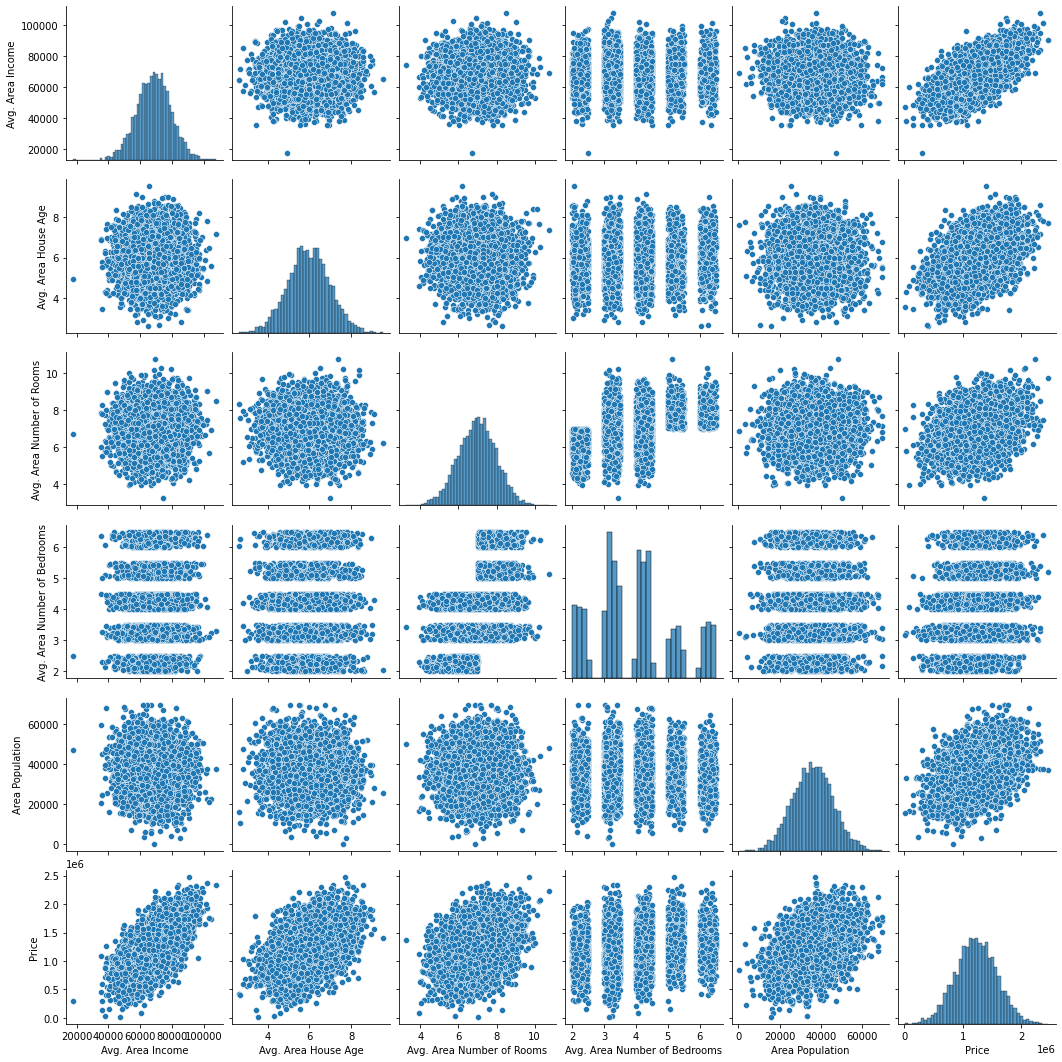

In [30]:
sns.pairplot(df, diag_kind='hist')

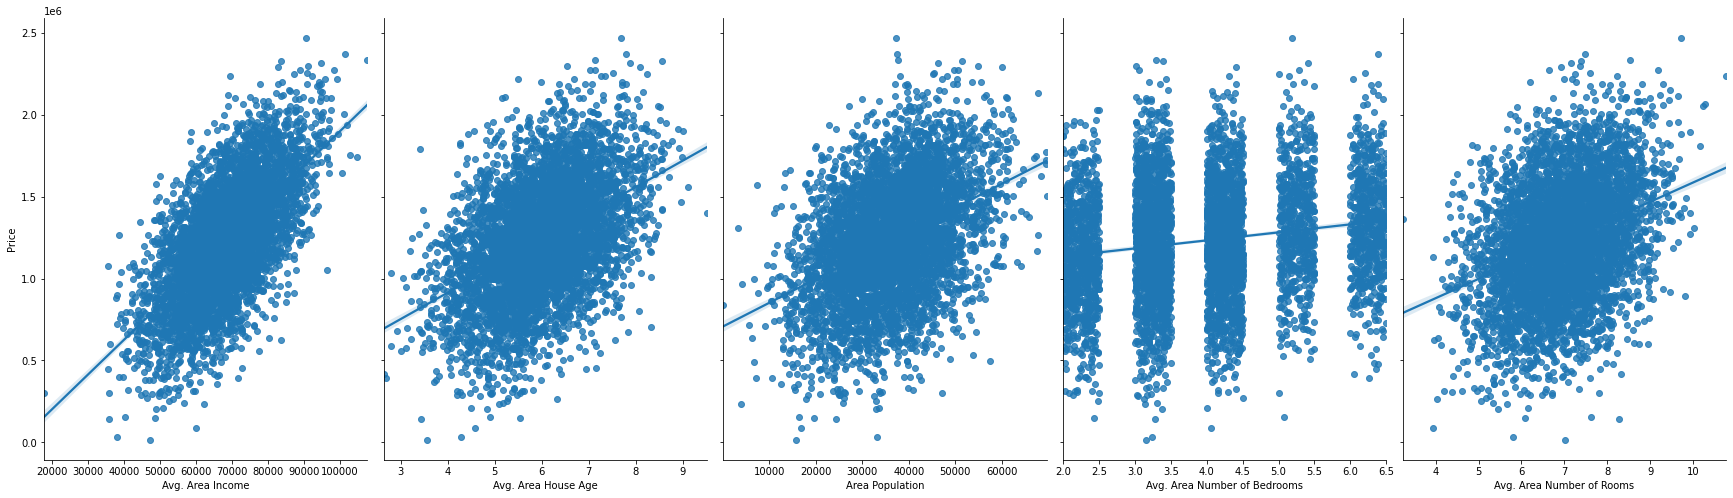

In [68]:
sns.pairplot(df, x_vars=['Avg. Area Income','Avg. Area House Age','Area Population', 'Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms'], y_vars='Price', height=7, aspect=0.7, kind='reg')

<AxesSubplot:>

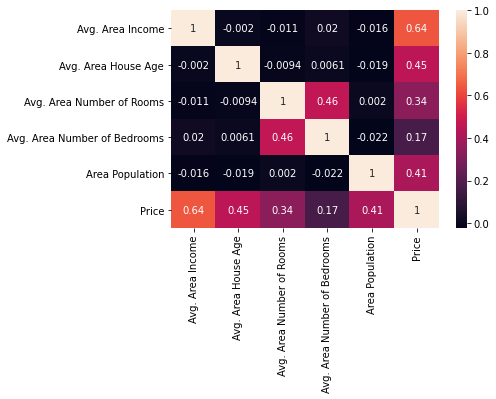

In [26]:
sns.heatmap(df.corr(),annot=True)

### APPLYING MINMAXSCALER to Scale the Dataset

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#### Naming the Independent Variable as "X" and Dependent Variable as "y"

In [31]:
X = df.iloc[:, :5].values
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [32]:
y = df.iloc[:, -1:].values
y

array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

### SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [40]:
X_train

array([[6.80911797e+04, 5.36420804e+00, 7.50295580e+00, 3.10000000e+00,
        4.45573797e+04],
       [7.57297655e+04, 5.58059854e+00, 7.64297333e+00, 4.21000000e+00,
        2.99960184e+04],
       [7.08854208e+04, 6.35874714e+00, 7.25024055e+00, 5.42000000e+00,
        3.86273015e+04],
       ...,
       [5.56218991e+04, 3.73594179e+00, 6.86829076e+00, 2.30000000e+00,
        6.31846131e+04],
       [6.30444601e+04, 5.93526139e+00, 5.91345361e+00, 4.10000000e+00,
        3.27252795e+04],
       [7.50787915e+04, 7.64477860e+00, 8.44072615e+00, 4.33000000e+00,
        5.61484493e+04]])

In [34]:
X_test

array([[6.67749958e+04, 5.71714320e+00, 7.79521482e+00, 4.32000000e+00,
        3.67889803e+04],
       [6.21845394e+04, 4.92575775e+00, 7.42768911e+00, 6.22000000e+00,
        2.60083091e+04],
       [7.36430573e+04, 6.76685319e+00, 8.33708535e+00, 3.34000000e+00,
        4.31521396e+04],
       ...,
       [4.87359245e+04, 5.54372966e+00, 6.09190600e+00, 2.43000000e+00,
        1.96823473e+04],
       [6.50815840e+04, 5.43357013e+00, 9.21251835e+00, 5.14000000e+00,
        3.75944935e+04],
       [6.59697070e+04, 7.32597562e+00, 8.02096551e+00, 4.09000000e+00,
        6.17727568e+04]])

### Training the Model

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
## Coefficient value  for the Trained Model

reg.coef_

array([[2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]])

In [37]:
## Intercept value  for the Trained Model

reg.intercept_

array([-2640159.79681377])

### Testing the Model

In [39]:
y_pred = reg.predict(X_test)
y_pred

array([[1260960.70581767],
       [ 827588.75544636],
       [1742421.24257437],
       ...,
       [ 372191.40613006],
       [1365217.15136995],
       [1914519.54191761]])

In [40]:
y_pred = reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1260960.71 1251688.62]
 [ 827588.76  873048.32]
 [1742421.24 1696977.66]
 ...
 [ 372191.41  151527.08]
 [1365217.15 1343824.22]
 [1914519.54 1906024.64]]


### Visualizing the Model Prediction

Text(0.5, 1.0, 'Output of the Model Prediction')

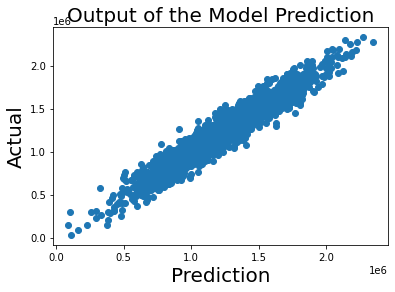

In [52]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction", fontsize= 20)
plt.ylabel("Actual", fontsize= 20)
plt.title("Output of the Model Prediction", fontsize= 20)

c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

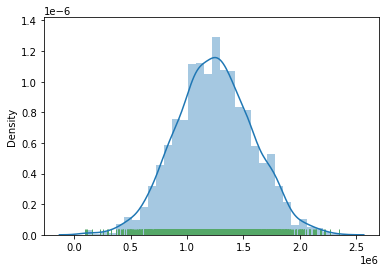

In [59]:
sns.distplot(y_pred, rug=True, rug_kws={"color": "g"})

### MODEL PERFORMANCE USING SOME METRICS

In [62]:
## CALCULATING THE MEAN SQUARED ERROR

from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

102278.82921589742


In [64]:
## ## CALCULATING THE MEAN ABSOLUTE ERROR

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

82288.22250721791

In [65]:
## CALCULATING THE METRICS USING RSQUARED SCORE

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.9176824009781859